# Creating and mounting the driver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'					        plant_model.json
'develop the logical framework basing on these dat....gsheet'   plant_model_weights.weights.h5
 plant_disease_detection.h5				       'T21-03-08644 melki (1).pdf'
 Plant_images_pianalytix				       'T21-03-08644 melki.pdf'


# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

# Observing some of the images in our dataset. And plotting the images here using maplotlib library

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread.imread(path+'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) #width of the image
  plt.ylabel(rand_img.shape[1], fontsize = 10) #height of the image

Output hidden; open in https://colab.research.google.com to view.

#  After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this

In [ ]:
# Converting images to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256, 256))
      #image = vc2.vcColor(image, cv2.COLOR_BGR2GRAY)
      return img_to_array(image)
    else:
      np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

# Converting the all the images into numpy array

In [ ]:
dir = "/content/drive/MyDrive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bactearial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

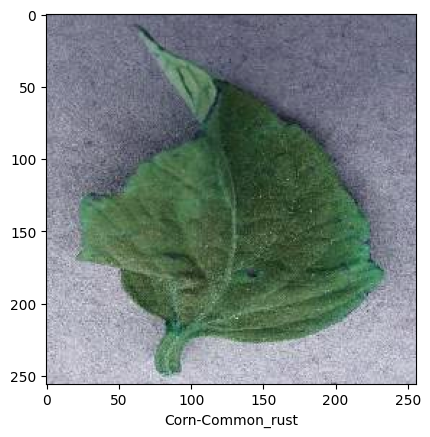

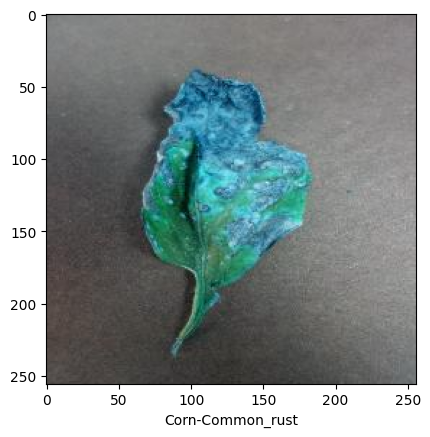

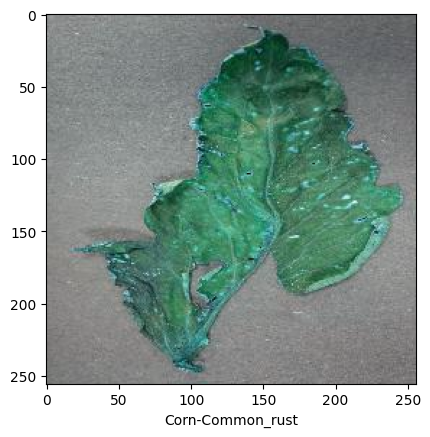

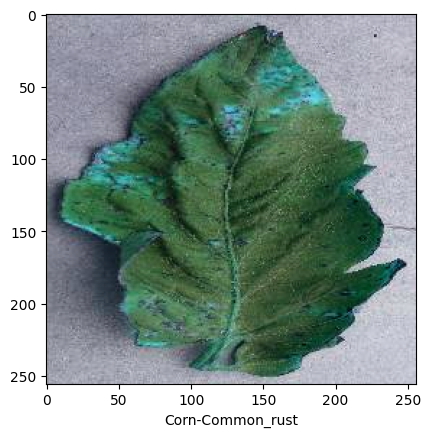

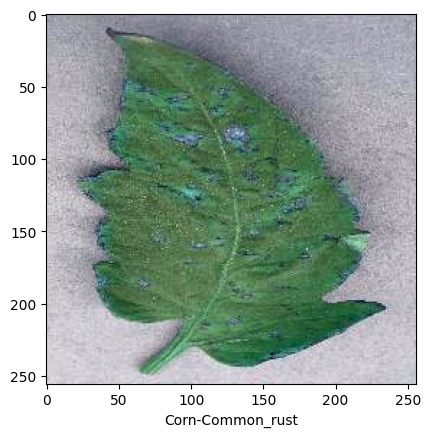

In [ ]:

point = 0
for _ in range(len(image_list)):  # Loop over the length of the image list
    img = array_to_img(image_list[point]) # Access the image from image_list
    label = label_list[point]  # Get the corresponding label
    plt.imshow(img)  # Display the image
    plt.xlabel(all_labels[label])  # Display the label
    plt.show()  # Show the plot
    point += 1  # Increment point
    if point >= len(image_list):  # Break when all images are displayed
        break

# Observing the number of images under different classed to see if the dataset is balanced or not

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


# Observing the shape of the image

In [ ]:
image_list[0].shape

(256, 256, 3)

# Checking the total number of images which is the length of the label list

In [ ]:
total_number_of_image = len(image_list)
print(total_number_of_image)

900


# Splinting our dataset into training and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Normalizing the dataset

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [ ]:
print(y_train)

[2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Creating the network architecture for the model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,225,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Spliting the training dataset into training and validation datasets

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# Fitting the model

In [ ]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Saving the mode in google driver

In [ ]:
model.save("/content/drive/MyDrive/plant_disease_detection.h5")
# Serailizing to json
json_model = model.to_json()
# Saving the model archtectural to JSON file
with open("/content/drive/MyDrive/plant_model.json", "w") as json_file:
  json_file.write(json_model)
#Saving the wieghts of the model
model.save_weights("/content/drive/MyDrive/plant_model_weights.weights.h5")

# Plotting the accuracy of the model due to training history

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train",'val'])
plt.show()

NameError: name 'history' is not defined

<Figure size 1200x500 with 0 Axes>

# Evaluating the model to know the accuracy of the model

In [ ]:
print("[INFO] calculating the model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]* 100}")

# Predicting the result

In [ ]:
y_pred = model.predict(x_test)

# Display the result of the choosen data

In [ ]:
img = array_to_img(x_test[10])
img

# comparing the result of the of testing and predected

In [ ]:
print(f"Original..." , all_labels[np.argmax(y_test[10])])
print(f"predicted..." , all_labels[np.argmax(y_pred[10])])

# Our model predicted correctly